In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [2]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/m3gofriends/My-Machine-and-Deep-Learning-Template-main/main/TrainingSet/wcbreast_wdbc.csv?token=GHSAT0AAAAAABYGU6UFBJABLKISHY5DNCDEYYVO2PQ", 
    na_values=['NA', '?'])

In [9]:
# Convert to numpy - Classification
x_columns = df.columns.drop('diagnosis').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['diagnosis']) # Classification
diagnosis = dummies.columns
y = dummies.values

In [10]:
print(x.shape)
print(y.shape)

(569, 30)
(569, 2)


In [11]:
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x,y,verbose=2,callbacks=[monitor],epochs=1000)

Epoch 1/1000
18/18 - 1s - loss: 65.0112 - 692ms/epoch - 38ms/step
Epoch 2/1000
18/18 - 0s - loss: 16.5996 - 39ms/epoch - 2ms/step
Epoch 3/1000
18/18 - 0s - loss: 3.0367 - 33ms/epoch - 2ms/step
Epoch 4/1000
18/18 - 0s - loss: 1.3243 - 34ms/epoch - 2ms/step
Epoch 5/1000
18/18 - 0s - loss: 0.8401 - 29ms/epoch - 2ms/step
Epoch 6/1000
18/18 - 0s - loss: 0.7790 - 32ms/epoch - 2ms/step
Epoch 7/1000
18/18 - 0s - loss: 0.5502 - 33ms/epoch - 2ms/step
Epoch 8/1000
18/18 - 0s - loss: 0.4389 - 34ms/epoch - 2ms/step
Epoch 9/1000
18/18 - 0s - loss: 0.3681 - 40ms/epoch - 2ms/step
Epoch 10/1000
18/18 - 0s - loss: 0.3406 - 31ms/epoch - 2ms/step
Epoch 11/1000
18/18 - 0s - loss: 0.3386 - 36ms/epoch - 2ms/step
Epoch 12/1000
18/18 - 0s - loss: 0.3439 - 29ms/epoch - 2ms/step
Epoch 13/1000
18/18 - 0s - loss: 0.3263 - 35ms/epoch - 2ms/step
Epoch 14/1000
18/18 - 0s - loss: 0.3571 - 31ms/epoch - 2ms/step
Epoch 15/1000
18/18 - 0s - loss: 0.4038 - 31ms/epoch - 2ms/step
Epoch 16/1000
18/18 - 0s - loss: 0.2761 - 33m

In [13]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (569, 2)
[[0.0000000e+00 1.0000000e+00]
 [1.1706565e-10 1.0000000e+00]
 [6.4818275e-09 1.0000000e+00]
 [3.6514562e-02 9.6348542e-01]
 [2.7007822e-08 1.0000000e+00]
 [5.8418431e-04 9.9941587e-01]
 [2.3616720e-10 1.0000000e+00]
 [8.9495234e-06 9.9999106e-01]
 [1.9796059e-01 8.0203938e-01]
 [7.7134721e-02 9.2286527e-01]]


In [14]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0

In [15]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes, predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9209138840070299


In [16]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(expected_classes, predict_classes)
print("Log loss score: {}".format(score))

# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred,axis=1) 

Numpy array of predictions


array([[0.    , 1.    ],
       [0.    , 1.    ],
       [0.    , 1.    ],
       [0.0365, 0.9635],
       [0.    , 1.    ]], dtype=float32)

As percent probability
[  0. 100.]
Log loss score: 2.7315671868488844


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.94 0.06]
 [0.11 0.89]]


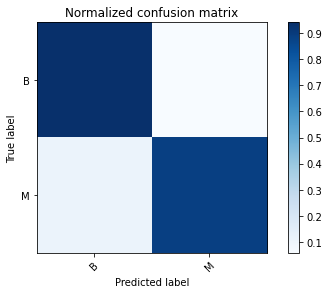

In [18]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(expected_classes, predict_classes)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, diagnosis, title='Normalized confusion matrix')

plt.show()